In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [2]:
df=pd.read_csv('/content/employee_data (1) 2.csv')
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


Missing values

In [ ]:
df.shape

(14249, 10)

In [ ]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [ ]:
df['recently_promoted'].unique()

array([nan,  1.])

In [3]:
df['recently_promoted'].fillna(0, inplace=True)

In [ ]:
df['filed_complaint'].fillna(0, inplace=True)

In [4]:
df.fillna(0, inplace=True)
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,0.0,0.932868,4,0.0,low,0.829896,Left,5.0
1,232,support,0.0,0.000000,3,0.0,low,0.834544,Employed,2.0
2,184,sales,0.0,0.788830,3,0.0,medium,0.834988,Employed,3.0
3,206,sales,0.0,0.575688,4,0.0,low,0.424764,Employed,2.0
4,249,sales,0.0,0.845217,3,0.0,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,0.0,0.735865,5,0.0,low,0.263282,Employed,5.0
14245,257,sales,0.0,0.638604,3,0.0,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,0.0,medium,0.898917,Left,5.0
14247,130,IT,0.0,0.757184,4,0.0,medium,0.641304,Employed,3.0


Boxplot

In [ ]:
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure'],
      dtype='object')

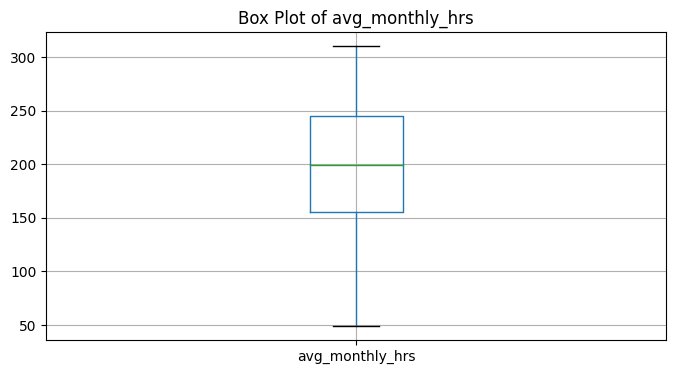

In [5]:
plt.figure(figsize=(8, 4))
df.boxplot('avg_monthly_hrs')
plt.title(f'Box Plot of avg_monthly_hrs')
plt.show()

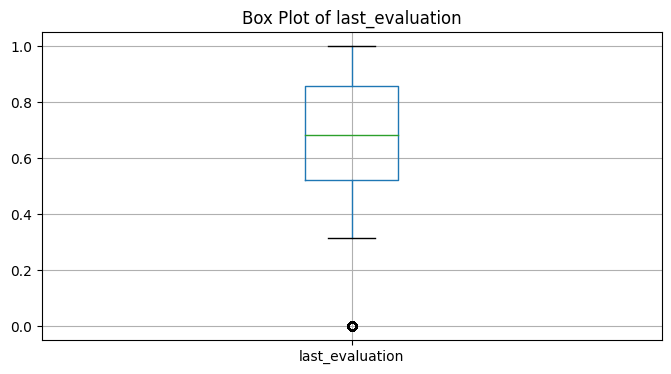

In [7]:
plt.figure(figsize=(8, 4))
df.boxplot('last_evaluation')
plt.title(f'Box Plot of last_evaluation')
plt.show()

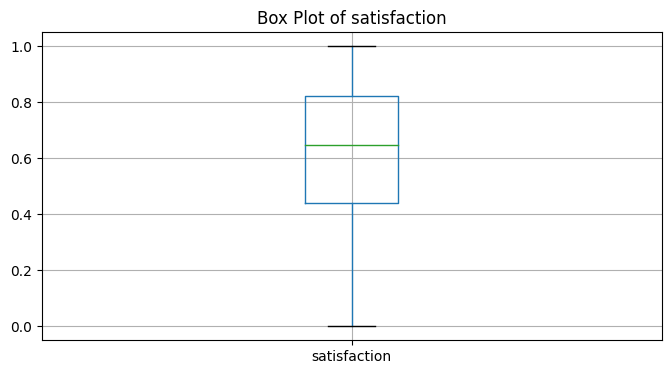

In [6]:
plt.figure(figsize=(8, 4))
df.boxplot('satisfaction')
plt.title(f'Box Plot of satisfaction')
plt.show()

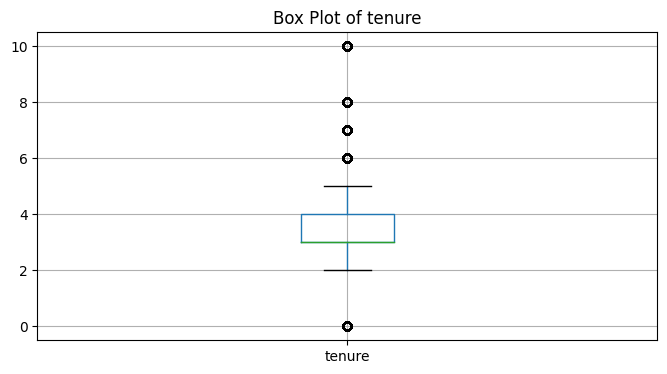

In [8]:
plt.figure(figsize=(8, 4))
df.boxplot('tenure')
plt.title(f'Box Plot of tenure')
plt.show()

No outliers found

Visualizing employee distribution

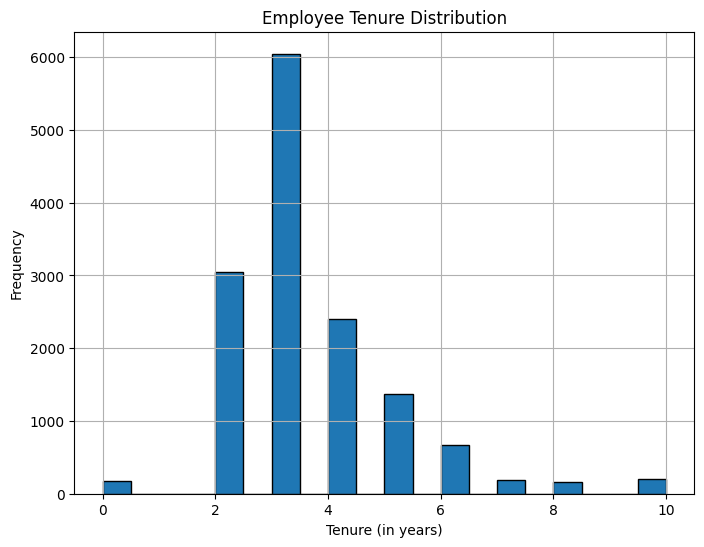

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'], bins=20, edgecolor='k')  # You can adjust the number of bins as needed
plt.title('Employee Tenure Distribution')
plt.xlabel('Tenure (in years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Employees who are in tenure of 3 yrs.
Most no. of employees are in 3 yrs of tenure.

[]

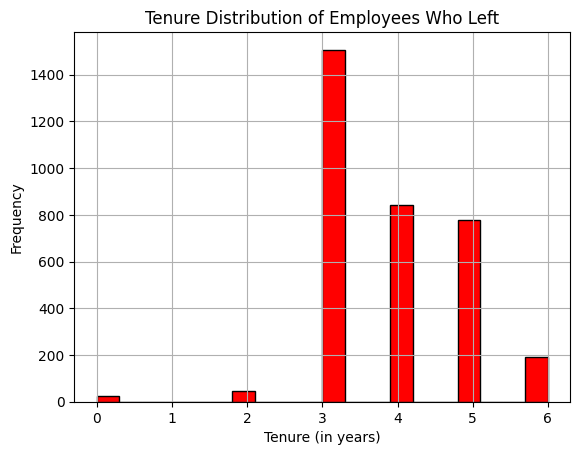

In [ ]:
left_df = df[df['status'] == 'Left']
plt.hist(left_df['tenure'], bins=20, edgecolor='k', color='red')
plt.title('Tenure Distribution of Employees Who Left')
plt.xlabel('Tenure (in years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.plot()

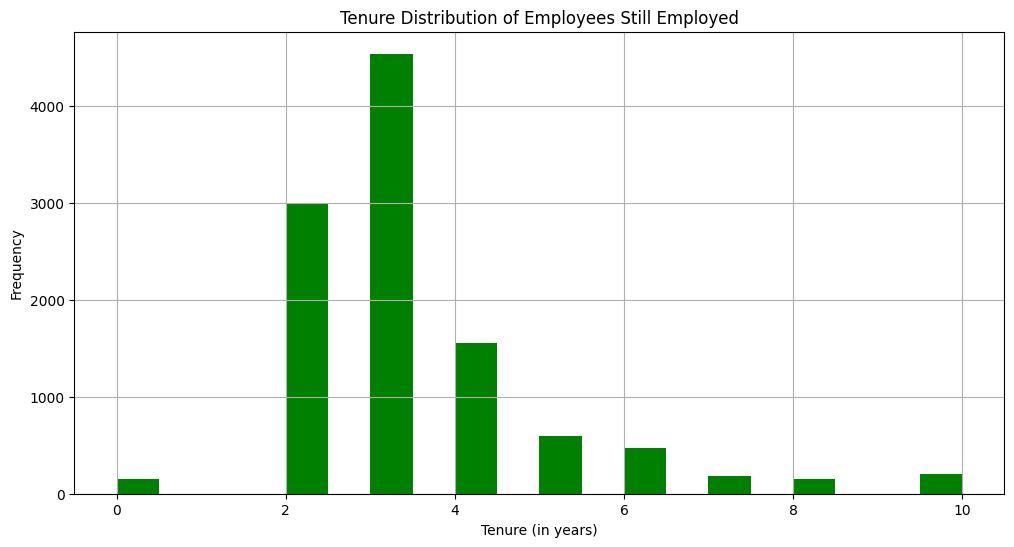

In [ ]:
employed_df = df[df['status'] == 'Employed']
plt.figure(figsize=(12, 6))
plt.hist(employed_df['tenure'], bins=20, color='green')
plt.title('Tenure Distribution of Employees Still Employed')
plt.xlabel('Tenure (in years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Both graphs shows that employees are from whom are in 3 yrs of tenure are most and are also leaving after 3 yrs of service.

boxplot to examine the distribution of job satisfaction

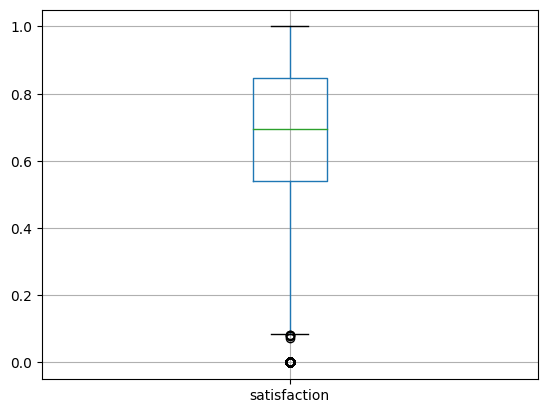

In [ ]:
employed_df = df[df['status'] == 'Employed']
employed_df.boxplot('satisfaction')
plt.show()

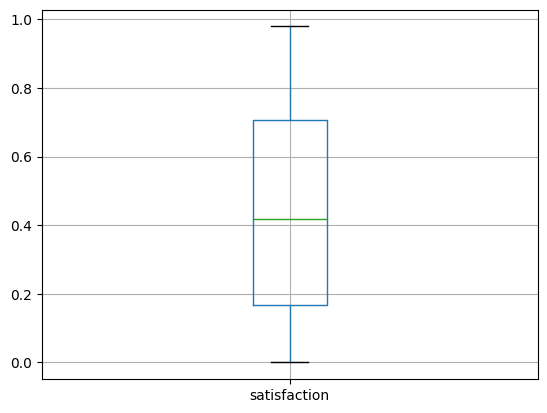

In [ ]:
left_df = df[df['status'] == 'Left']
left_df .boxplot('satisfaction')
plt.show()

Employee distribution who has left and hasn't

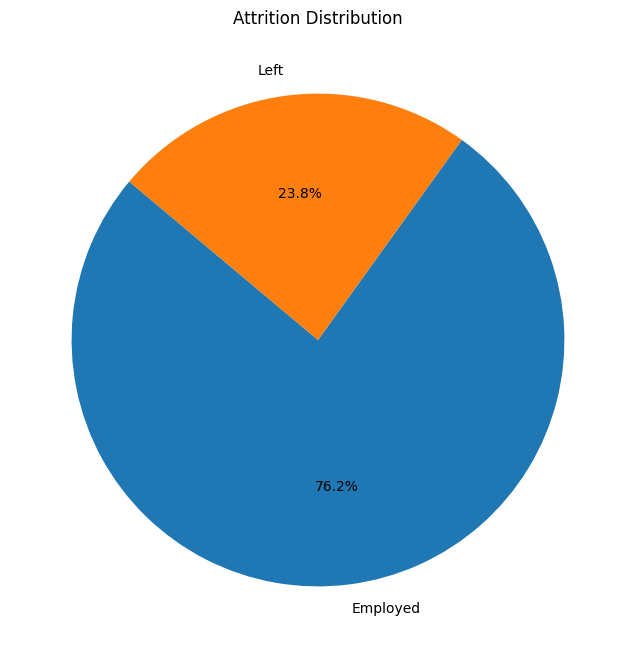

Percentage of employees who have left: 23.8%


In [ ]:
ac= df['status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(ac, labels=ac.index, autopct='%1.1f%%', startangle=140)
plt.title('Attrition Distribution')
plt.show()
percentage_left = (ac['Left'] / len(df)) * 100
print(f'Percentage of employees who have left: {percentage_left:.1f}%')

23.8 percent of employees have left the service.

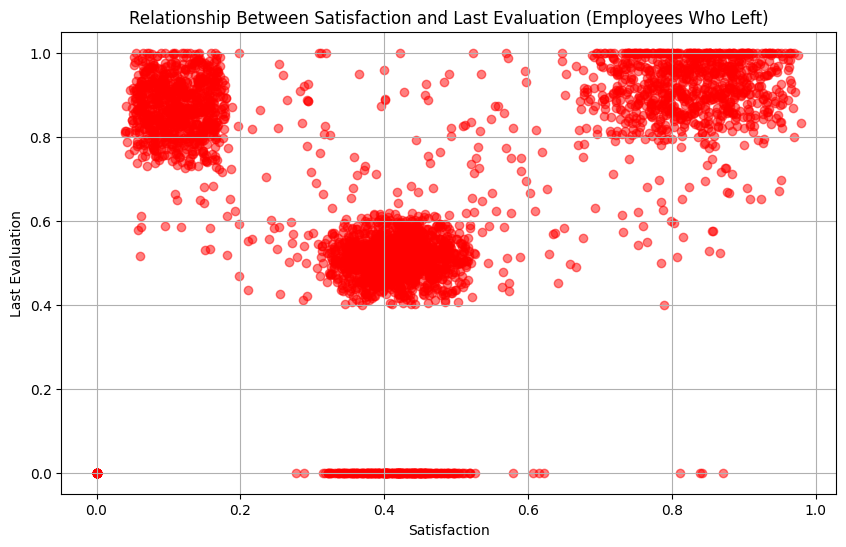

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(left_df['satisfaction'], left_df['last_evaluation'], c='red', alpha=0.5)
plt.title('Relationship Between Satisfaction and Last Evaluation (Employees Who Left)')
plt.xlabel('Satisfaction')
plt.ylabel('Last Evaluation')
plt.grid(True)
plt.show()

Splitting the dataset

In [9]:
selected_features = ['tenure', 'satisfaction', 'n_projects']
X = df[selected_features]
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree

In [17]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.93
Confusion Matrix:
[[2082  107]
 [  80  581]]


Visualizing the tree

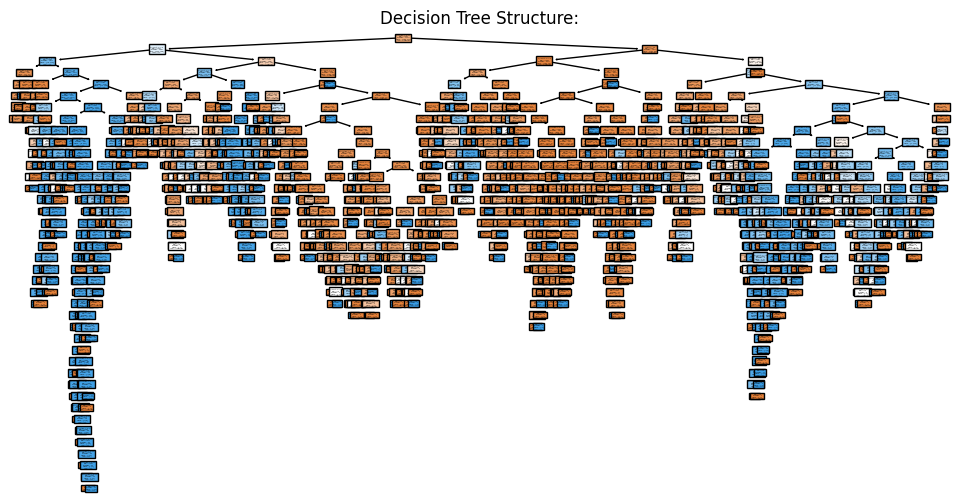

In [18]:
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=selected_features, class_names=clf.classes_)
plt.title('Decision Tree Structure:')
plt.show()

In [11]:
#Entropy
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
report_entropy = classification_report(y_test, y_pred_entropy)

print("\nDecision Tree Classifier with Entropy:")
print(f'Accuracy: {accuracy_entropy:.2f}')
print('Confusion Matrix:')
print(confusion_entropy)
print('Classification Report:')
print(report_entropy)


Decision Tree Classifier with Entropy:
Accuracy: 0.93
Confusion Matrix:
[[2079  110]
 [  80  581]]
Classification Report:
              precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2189
        Left       0.84      0.88      0.86       661

    accuracy                           0.93      2850
   macro avg       0.90      0.91      0.91      2850
weighted avg       0.93      0.93      0.93      2850



In [12]:
#Gini impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
accuracy_gini = accuracy_score(y_test, y_pred_gini)
confusion_gini = confusion_matrix(y_test, y_pred_gini)
report_gini = classification_report(y_test, y_pred_gini)

print("Decision Tree Classifier with Gini Impurity:")
print(f'Accuracy: {accuracy_gini:.2f}')
print('Confusion Matrix:')
print(confusion_gini)
print('Classification Report:')
print(report_gini)

Decision Tree Classifier with Gini Impurity:
Accuracy: 0.93
Confusion Matrix:
[[2082  107]
 [  80  581]]
Classification Report:
              precision    recall  f1-score   support

    Employed       0.96      0.95      0.96      2189
        Left       0.84      0.88      0.86       661

    accuracy                           0.93      2850
   macro avg       0.90      0.92      0.91      2850
weighted avg       0.94      0.93      0.93      2850



From both the confusion matrix data. It shows gini impurity is considered as best split.

In [19]:
min_samples_leaf_values = [1, 5, 10, 20]  # Different values for minimum leaf size
max_depth_values = [None, 4, 8, 12]       # Different values for maximum depth

for min_samples_leaf in min_samples_leaf_values:
    for max_depth in max_depth_values:
        clf = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Min Samples Leaf: {min_samples_leaf}, Max Depth: {max_depth}")
        print(f"Accuracy: {accuracy:.2f}")

Min Samples Leaf: 1, Max Depth: None
Accuracy: 0.93
Min Samples Leaf: 1, Max Depth: 4
Accuracy: 0.94
Min Samples Leaf: 1, Max Depth: 8
Accuracy: 0.96
Min Samples Leaf: 1, Max Depth: 12
Accuracy: 0.95
Min Samples Leaf: 5, Max Depth: None
Accuracy: 0.95
Min Samples Leaf: 5, Max Depth: 4
Accuracy: 0.94
Min Samples Leaf: 5, Max Depth: 8
Accuracy: 0.96
Min Samples Leaf: 5, Max Depth: 12
Accuracy: 0.95
Min Samples Leaf: 10, Max Depth: None
Accuracy: 0.96
Min Samples Leaf: 10, Max Depth: 4
Accuracy: 0.94
Min Samples Leaf: 10, Max Depth: 8
Accuracy: 0.96
Min Samples Leaf: 10, Max Depth: 12
Accuracy: 0.96
Min Samples Leaf: 20, Max Depth: None
Accuracy: 0.96
Min Samples Leaf: 20, Max Depth: 4
Accuracy: 0.94
Min Samples Leaf: 20, Max Depth: 8
Accuracy: 0.96
Min Samples Leaf: 20, Max Depth: 12
Accuracy: 0.96


When the min. sample leaf is 20. the mode accuracy is better.

In [14]:
print("Results for Gini Impurity:")
for min_samples_leaf in min_samples_leaf_values:
    for max_depth in max_depth_values:

        clf_gini = DecisionTreeClassifier(criterion='gini', min_samples_leaf=min_samples_leaf, max_depth=max_depth, random_state=42)
        clf_gini.fit(X_train, y_train)
        y_pred_gini = clf_gini.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred_gini)
        precision = precision_score(y_test, y_pred_gini, pos_label='Left')
        recall = recall_score(y_test, y_pred_gini, pos_label='Left')
        f1 = f1_score(y_test, y_pred_gini, pos_label='Left')
        print(f"Min Samples Leaf: {min_samples_leaf}, Max Depth: {max_depth}")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1:.2f}")
        print("----")

Results for Gini Impurity:
Min Samples Leaf: 1, Max Depth: None
Accuracy: 0.93
Precision: 0.84
Recall: 0.88
F1-Score: 0.86
----
Min Samples Leaf: 1, Max Depth: 4
Accuracy: 0.94
Precision: 0.83
Recall: 0.92
F1-Score: 0.87
----
Min Samples Leaf: 1, Max Depth: 8
Accuracy: 0.96
Precision: 0.91
Recall: 0.91
F1-Score: 0.91
----
Min Samples Leaf: 1, Max Depth: 12
Accuracy: 0.95
Precision: 0.88
Recall: 0.89
F1-Score: 0.89
----
Min Samples Leaf: 5, Max Depth: None
Accuracy: 0.95
Precision: 0.90
Recall: 0.89
F1-Score: 0.89
----
Min Samples Leaf: 5, Max Depth: 4
Accuracy: 0.94
Precision: 0.83
Recall: 0.92
F1-Score: 0.87
----
Min Samples Leaf: 5, Max Depth: 8
Accuracy: 0.96
Precision: 0.92
Recall: 0.90
F1-Score: 0.91
----
Min Samples Leaf: 5, Max Depth: 12
Accuracy: 0.95
Precision: 0.91
Recall: 0.90
F1-Score: 0.90
----
Min Samples Leaf: 10, Max Depth: None
Accuracy: 0.96
Precision: 0.91
Recall: 0.89
F1-Score: 0.90
----
Min Samples Leaf: 10, Max Depth: 4
Accuracy: 0.94
Precision: 0.83
Recall: 0.92


These models have a maximum depth of 8, which limits the complexity of the tree while capturing important patterns in the data.

Confusion matrix

In [23]:
criterion_values = ['gini', 'entropy']
models = {}
for criterion in criterion_values:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    models[criterion] = clf

confusion_matrix_data = pd.DataFrame(index=['True Positive', 'True Negative', 'False Positive', 'False Negative'])
for criterion, clf in models.items():
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrix_data[criterion.capitalize()] = [cm[1, 1], cm[0, 0], cm[0, 1], cm[1, 0]]


Plotting the confusion matrix

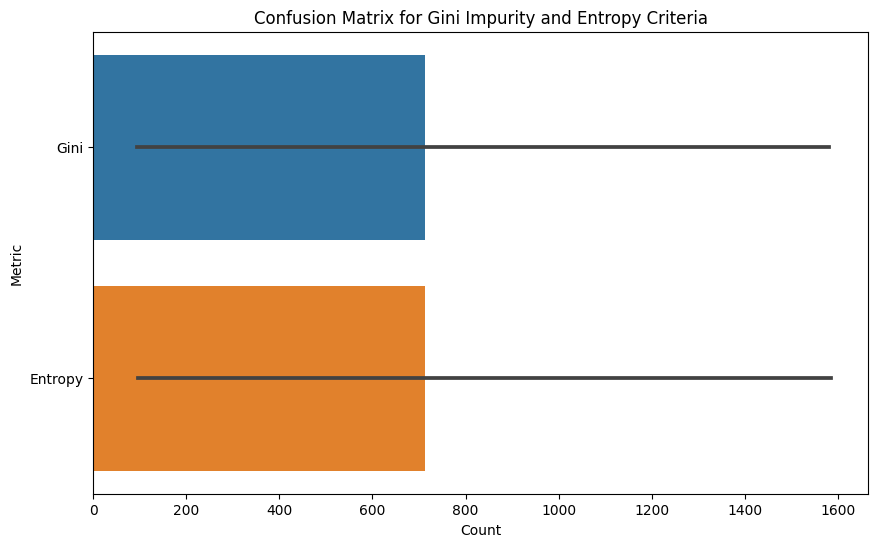

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=confusion_matrix_data, orient='h')
plt.title('Confusion Matrix for Gini Impurity and Entropy Criteria')
plt.xlabel('Count')
plt.ylabel('Metric')
plt.show()

Feature importance

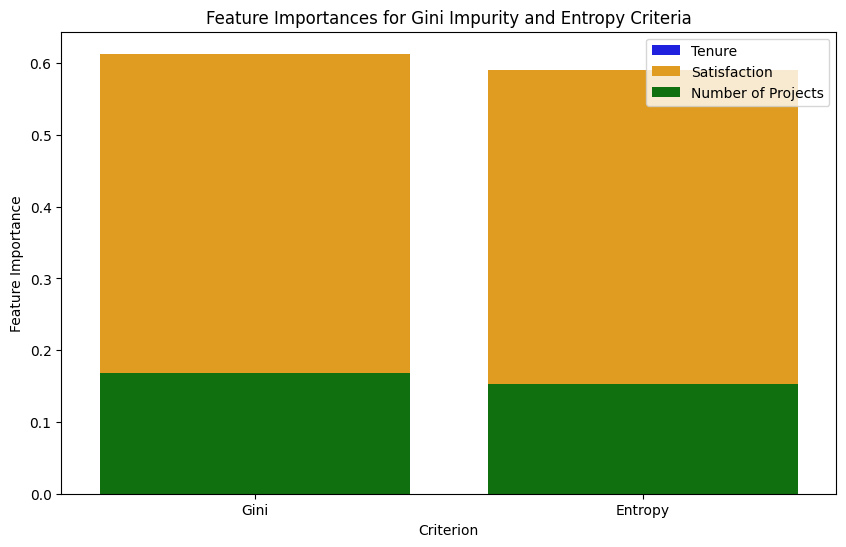

In [32]:
criterion_values = ['gini', 'entropy']
models = {}
for criterion in criterion_values:
    clf = DecisionTreeClassifier(criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    models[criterion] = clf

feature_importances = {}
for criterion, clf in models.items():
    feature_importances[criterion.capitalize()] = clf.feature_importances_

importance_df = pd.DataFrame(data=feature_importances, index=selected_features)
importance_df = importance_df.T

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x=importance_df.index, y='tenure', label='Tenure', color='blue')
sns.barplot(data=importance_df, x=importance_df.index, y='satisfaction', label='Satisfaction', color='orange')
sns.barplot(data=importance_df, x=importance_df.index, y='n_projects', label='Number of Projects', color='green')
plt.title('Feature Importances for Gini Impurity and Entropy Criteria')
plt.xlabel('Criterion')
plt.ylabel('Feature Importance')
plt.legend()
plt.show()